In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
import sympy as sp
sp.init_printing()
import math as mt
import pandas as pd
import urllib.request

# Actividad 04: Interpolación

---
### Profesor: Juan Marcos Marín
### Nombre: ______
*Métodos computacionales 2024-II*

---

In [ ]:
#librerias
from scipy.interpolate import lagrange
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicHermiteSpline, BarycentricInterpolator, CubicSpline
import sympy as sp

# 1a
Supongamos que queremos interpolar la función  $f(x)=\sin(x)$  usando los puntos  $x_0=0$ ,  $x_1=\pi/2$ , y  $x_2=\pi$.

Encuentre el polinomio de interpolación de Lagrange y el error asociado al misma. Recuerde que el error de interpolación de Lagrange puede expresarse explícitamente como:

\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},
Donde:
- $f^{(n+1)}(\xi)$ es la derivada de orden $n$ de la función $f(x)$ evaluada en algún punto $\xi$ en el intervalo de interpolación.



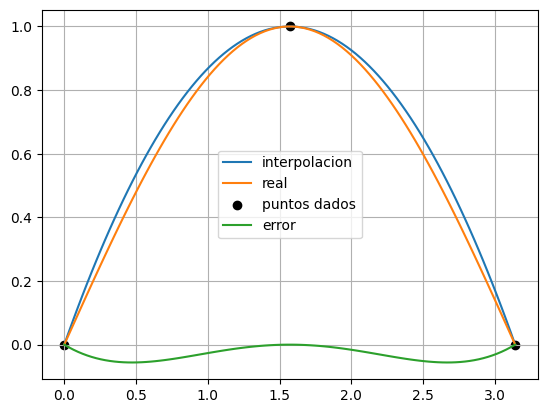

In [ ]:
#declarar puntos dados
x_dados=np.array([0,np.pi/2,np.pi])
y_dados=np.sin(x_dados)

#polinomio
pol=lagrange(x_dados,y_dados) #numerico

#intervalo
x_valores=np.linspace(0,np.pi,100)

#evaluamos
y_interpolados=pol(x_valores)
y_real=np.sin(x_valores)

#error
error=y_real-y_interpolados

#graficar
plt.plot(x_valores,y_interpolados,label='interpolacion')
plt.plot(x_valores,y_real,label='real')
plt.scatter(x_dados,y_dados,label='puntos dados',color='black')
plt.plot(x_valores, error, label='error')
plt.legend()
plt.grid()
plt.show()

# 1b
Repita el numeral anterior, pero para los polinomios de interpolación de Hermite, conociendo que:


$$
f(x) - P(x) = \epsilon = \frac{f^{(2n+2)}(\xi)}{(2n+2)!} \prod_{i=0}^{n} (x - x_i)^2
$$

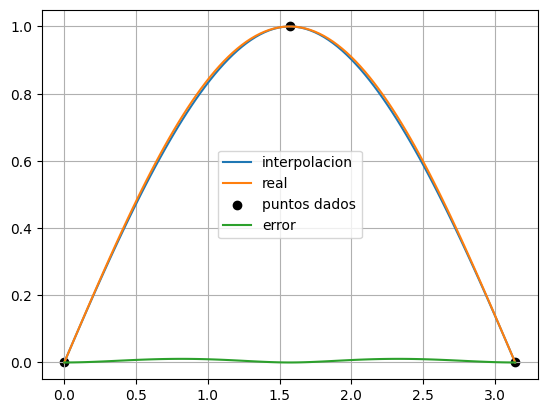

In [ ]:
#declarar puntos dados
x_dados=np.array([0,np.pi/2,np.pi])
y_dados=np.sin(x_dados)
dydx=np.cos(x_dados)

#polinomio
pol=CubicHermiteSpline(x_dados,y_dados,dydx) #numerico

#intervalo
x_valores=np.linspace(0,np.pi,100)

#evaluamos
y_interpolados=pol(x_valores)
y_real=np.sin(x_valores)

#error
error=y_real-y_interpolados

#graficar
plt.plot(x_valores,y_interpolados,label='interpolacion')
plt.plot(x_valores,y_real,label='real')
plt.scatter(x_dados,y_dados,label='puntos dados',color='black')
plt.plot(x_valores, error, label='error')
plt.legend()
plt.grid()
plt.show()

# 2

En física nuclear se calcula la sección eficaz de dispersión (scattering cross section) a partir de experimentos de colisiones, se sabe a partir de la teoría que la sección eficaz se describe por la formula de Breit-Wigner,

$$\sigma(E)=\frac{\sigma_0}{(E-E_r)^2+\frac{\Gamma^2}{4}}$$

donde $E$ es la energía y $E_r,\sigma_0, \Gamma$ son parámetros a ajustar; el valor predicho es $(E_r,\Gamma) = (78, 55)$ MeV; donde $\sigma_0$ se puede calcular ahora a partir de la fórmula simplemente remplazando cualquier par de puntos de la tabla.

A partir de los valores de energía,


```
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

```

* Calcule los polinomios de Lagrange, Newton y Hermite.

* Haga un gráfico de los polinomios junto con la función.

* Finalmente, a partir de la diferencia $|f(x) - P_n(x)|$ calcule el error asociado a cada uno de ellos. ¿Cuál será el mejor?

In [ ]:
#datos dado
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

E_r=78
gama=55

#hallamos sigma_0 como el promedio reemplazando en la ecuacion los valores experimentales
sigma_0 = lambda Energia, sigma_exp: sigma_exp*((Energia - E_r)**2 + gama**2/4)
sigma_0 = sigma_0(Energia, sigma_exp)
sigma_0 = np.mean(sigma_0)

#funcion
sigma = lambda Energia: sigma_0/((Energia-E_r)**2+gama**2/4)

#hallamos la derivada
df = np.gradient(sigma_exp, Energia, edge_order=2)
print(df)
dydx = df


#polinomios
interpolacion_lagrange=lagrange(Energia,sigma_exp)
interpolacion_newton=BarycentricInterpolator(Energia,sigma_exp)
interpolacion_hermite=CubicHermiteSpline(Energia,sigma_exp,dydx)



[-0.256  0.688  1.35   0.156 -1.272 -0.84  -0.233 -0.122 -0.162]


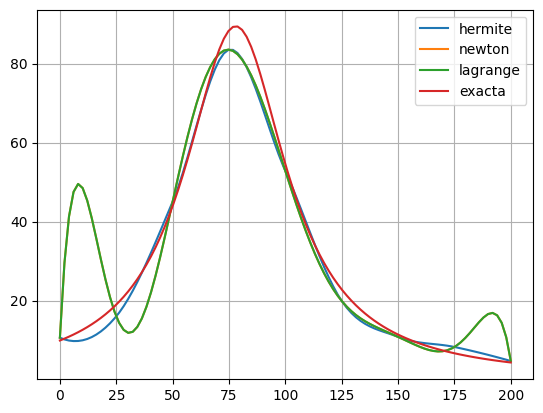

In [ ]:
#graficamos interpolaciones

x_valores=np.linspace(0,200,100)

plt.plot(x_valores,interpolacion_hermite(x_valores), label='hermite')
plt.plot(x_valores,interpolacion_newton(x_valores), label='newton')
plt.plot(x_valores,interpolacion_lagrange(x_valores), label='lagrange')
plt.plot(x_valores,sigma(x_valores), label='exacta')
plt.legend()
plt.grid()
plt.show()

Ahora miraremos los errores

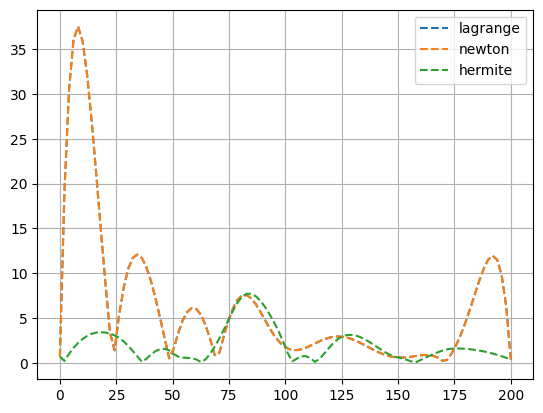

In [ ]:
error_lagrange=abs(sigma(x_valores)-interpolacion_lagrange(x_valores))
error_newton=abs(sigma(x_valores)-interpolacion_newton(x_valores))
error_hermite=abs(sigma(x_valores)-interpolacion_hermite(x_valores))

plt.plot(x_valores,error_lagrange,'--', label='lagrange')
plt.plot(x_valores,error_newton, '--',label='newton')
plt.plot(x_valores,error_hermite, '--',label='hermite')
plt.legend()
plt.grid()
plt.show()

In [ ]:
max_error_lagrange = np.max(np.abs(error_lagrange))
max_error_newton = np.max(np.abs(error_newton))
max_error_hermite = np.max(np.abs(error_hermite))

print("El error máximo de Lagrange es:", max_error_lagrange)
print("El error máximo de Newton es:", max_error_newton)
print("El error máximo de Hermite es:", max_error_hermite)

El error máximo de Lagrange es: 37.53393848943617
El error máximo de Newton es: 37.53393848943622
El error máximo de Hermite es: 7.7050727230102325


In [ ]:
promedio_error_lagrange = np.mean(np.abs(error_lagrange))
promedio_error_newton = np.mean(np.abs(error_newton))
promedio_error_hermite = np.mean(np.abs(error_hermite))

print("El error promedio de Lagrange es:", promedio_error_lagrange)
print("El error promedio de Newton es:", promedio_error_newton)
print("El error promedio de Hermite es:", promedio_error_hermite)

El error promedio de Lagrange es: 6.25414584889858
El error promedio de Newton es: 6.2541458488627795
El error promedio de Hermite es: 2.007523751204664


Como el error max y promedio de hermite es menor, concluimos que es el mejor

---



#3
Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

* Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
* Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de `sympy` y encuente el error en la interpolación. La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbólica para realizar la estimación de dicha cuota, sólo para $n = 4$, en el punto $x=0.5$.

* Repita la parte inicial para el conjunto de $p_n(x)$ con $n=\{ 4, 8, 12, 16, 20 \}$, usando la interpolación de Hermite, ¿existe alguna diferencia?

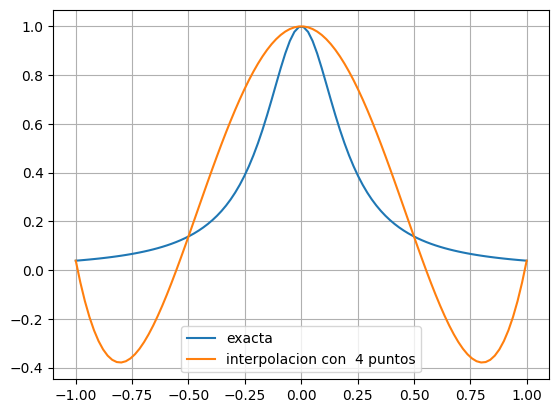

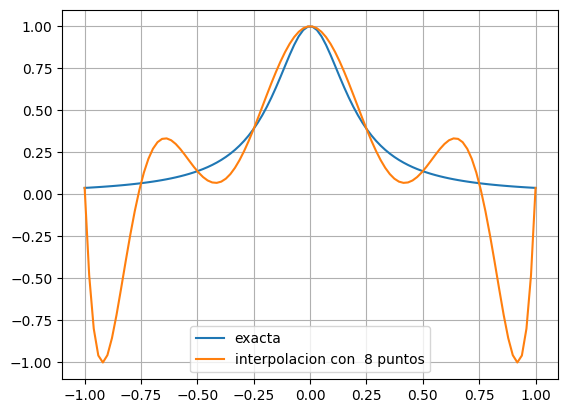

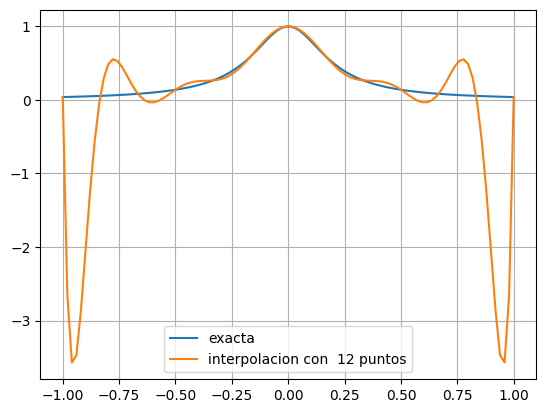

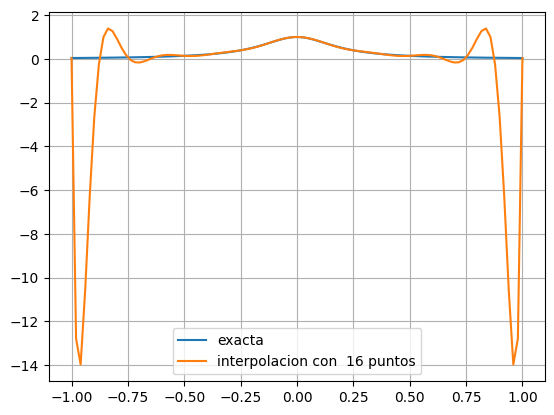

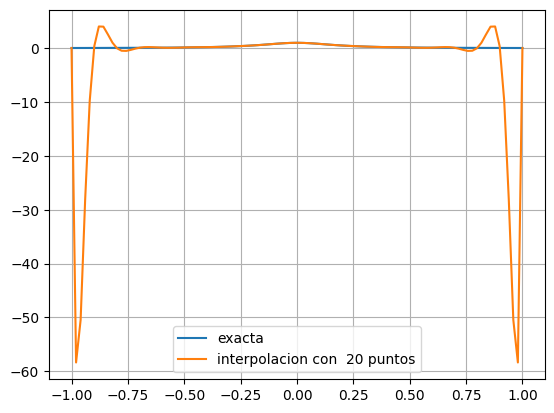

In [ ]:
#funcion original
f= lambda x: 1/(1+25*x**2)

#puntos dados
n=np.array([4,8,12,16,20])
x_valores=np.linspace(-1,1,100)
for i in n:
  y=np.zeros(n)
  x_dados=np.linspace(-1,1,i+1)
  y_dados=1/(1+25*x_dados**2)

  #interpolacion
  int_lagrange=lagrange(x_dados,y_dados) #me da el polinomio

  #evaluar el polinomio
  pol_eval=int_lagrange(x_valores)

  plt.plot(x_valores,f(x_valores), label='exacta')
  plt.plot(x_valores,pol_eval, label='interpolacion con  '+str(i)+' puntos')
  plt.legend()
  plt.grid()
  plt.show()




Gráficamente se ve cómo aumenta el error con el fenomeno de runge

In [ ]:
#el error simbolicamente

#funcion simbolica
x = sp.symbols('x')
f = 1 / (1 + 25*x**2)

def error_f(n):
  x_puntos=np.linspace(-1,1,n)
  z=sp.symbols('z')
  f_n1 = sp.diff(f, x, n+1)
  xi=sp.symbols('xi')
  error=1/sp.factorial(n+1)*f_n1.subs(x,xi)*np.prod([(0.5-x_puntos[j])for j in range(n)])
  error_eval=error.subs(xi,0.5)
  return error_eval

print(error_f(4))



0.646550529805696


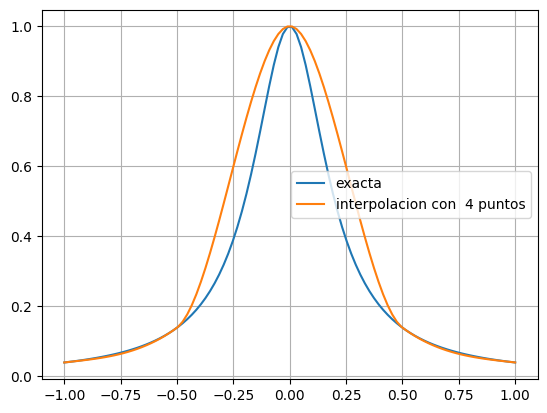

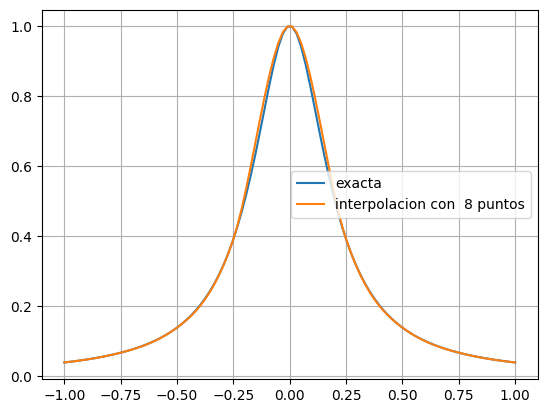

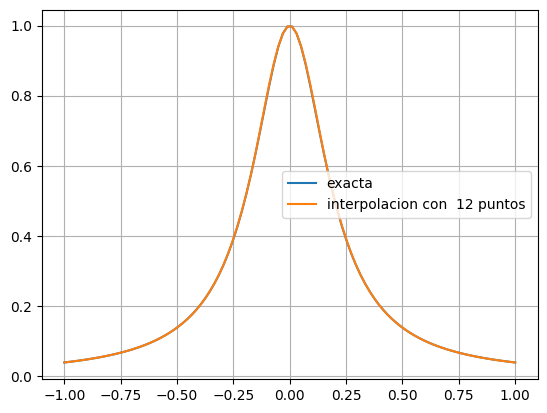

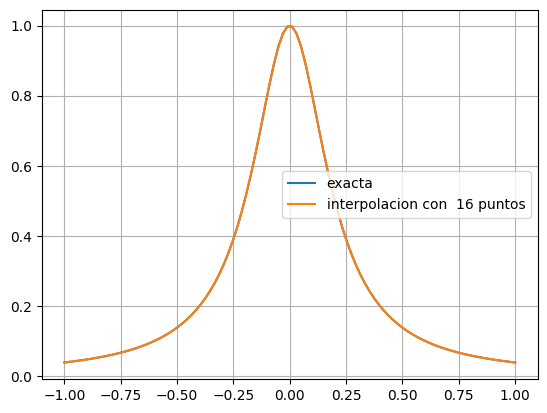

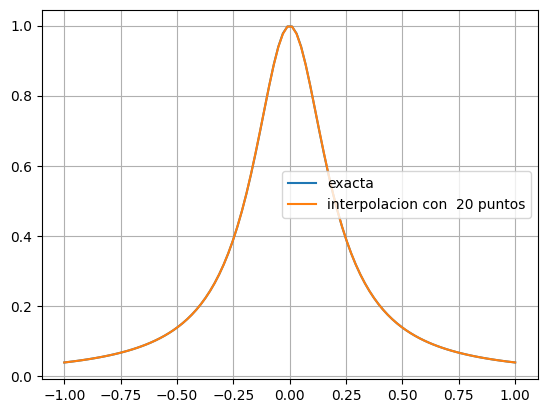

In [ ]:
#funcion original
f= lambda x: 1/(1+25*x**2)

#funcion simbolica
x = sp.symbols('x')
f_sym = 1 / (1 + 25*x**2)

#puntos dados
n=np.array([4,8,12,16,20])
x_valores=np.linspace(-1,1,100)
for i in n:
  y=np.zeros(n)
  x_dados=np.linspace(-1,1,i+1)
  y_dados=1/(1+25*x_dados**2)


  derivada=sp.diff(f_sym,x)
  dydx_num=sp.lambdify(x,derivada)
  dydx=dydx_num(x_dados)



  #interpolacion
  int_lagrange=CubicHermiteSpline(x_dados,y_dados,dydx) #me da el polinomio con la derivada evaluada

  #evaluar el polinomio
  pol_eval=int_lagrange(x_valores)

  plt.plot(x_valores,f(x_valores), label='exacta')
  plt.plot(x_valores,pol_eval, label='interpolacion con  '+str(i)+' puntos')
  plt.legend()
  plt.grid()
  plt.show()


La diferencia es el fenomeno de runge

# 4

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).

Ref: Metodos numericos, Burden.


Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ del pato.

3. Representar el polinomio de interpolación de Lagrange y de Hermite en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?



In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow
import urllib.request
import numpy as np

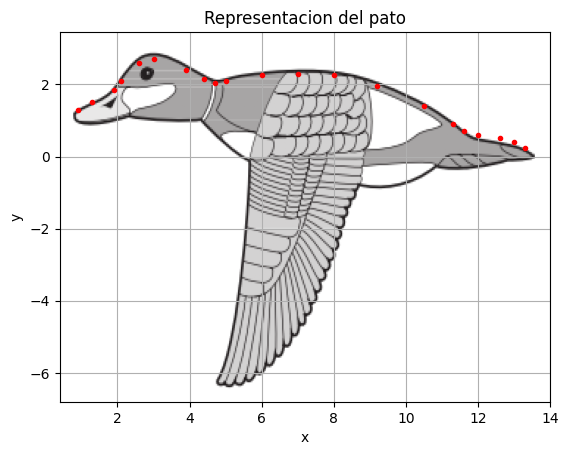

In [ ]:
pato = 'https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png' #URL
urllib.request.urlretrieve(pato, 'pato.jpg')# Decargar la imagen
imagen_pato = plt.imread('pato.jpg') # Variable con la imagen del pato

# Definimos los puntos del pato
xp = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]
yp = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]

# Representamos graficamente al pato y los puntos que definimos para su contorno superior
plt.figure()
plt.title('Representacion del pato')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45)) # Ajustamos los pixeles para que coinsidan con x y y
plt.plot(xp, yp, '.r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

In [ ]:
dydx = np.gradient(yp, xp, edge_order=2)

inter_lagrange=lagrange(xp,yp)
inter_newton=BarycentricInterpolator(xp,yp)
inter_hermite=CubicHermiteSpline(xp,yp,dydx)
inter_spline=CubicSpline(xp,yp)

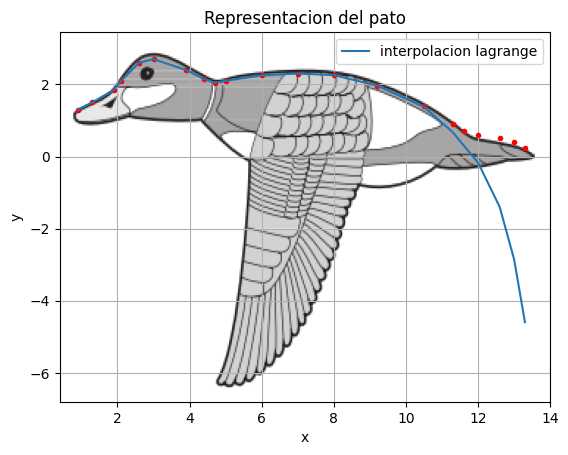

In [ ]:
# Representamos graficamente al pato y los puntos que definimos para su contorno superior
plt.figure()
plt.title('Representacion del pato')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45)) # Ajustamos los pixeles para que coinsidan con x y y
plt.plot(xp, yp, '.r')
plt.plot(xp, inter_lagrange(xp), label='interpolacion lagrange')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

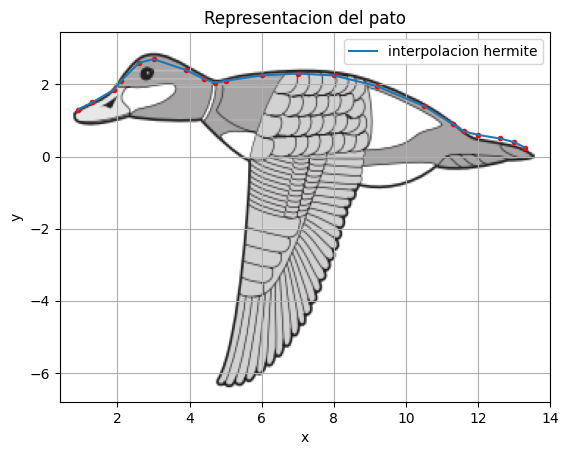

In [ ]:
# Representamos graficamente al pato y los puntos que definimos para su contorno superior
plt.figure()
plt.title('Representacion del pato')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45)) # Ajustamos los pixeles para que coinsidan con x y y
plt.plot(xp, yp, '.r')
plt.plot(xp, inter_hermite(xp), label='interpolacion hermite')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

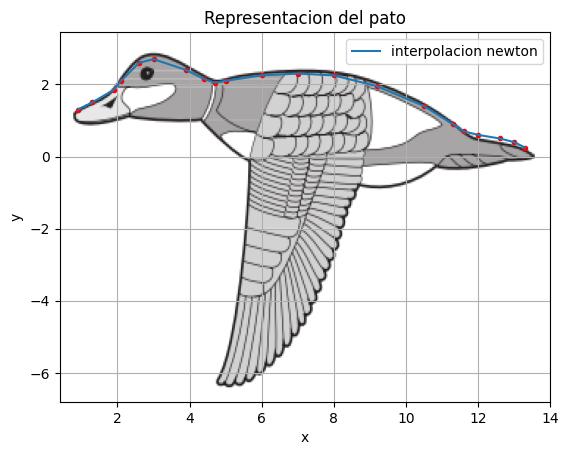

In [ ]:
# Representamos graficamente al pato y los puntos que definimos para su contorno superior
plt.figure()
plt.title('Representacion del pato')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45)) # Ajustamos los pixeles para que coinsidan con x y y
plt.plot(xp, yp, '.r')
plt.plot(xp, inter_newton(xp), label='interpolacion newton')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

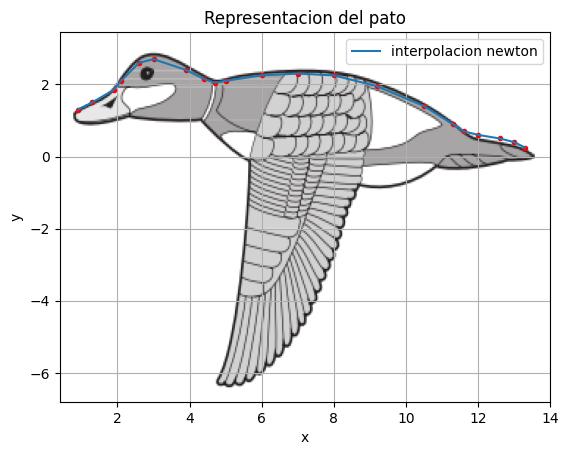

In [ ]:
# Representamos graficamente al pato y los puntos que definimos para su contorno superior
plt.figure()
plt.title('Representacion del pato')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45)) # Ajustamos los pixeles para que coinsidan con x y y
plt.plot(xp, yp, '.r')
plt.plot(xp, inter_spline(xp), label='interpolacion newton')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()